# Zadanie 1

Dla poniższych danych X, y zbuduj model regresji logistycznej i wyświetl oprócz współczynników ich przedziały ufności (lub p-value).

In [2]:
import statsmodels.api as sm
import pandas as pd
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
print(list(data.target_names))
print((data.data).shape)

X=data.data[:,:6]
y=data.target

model1 = sm.Logit(y,X).fit()

print(model1.summary())

['malignant', 'benign']
(569, 30)
Optimization terminated successfully.
         Current function value: 0.150867
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  569
Model:                          Logit   Df Residuals:                      563
Method:                           MLE   Df Model:                            5
Date:                Mon, 14 Dec 2020   Pseudo R-squ.:                  0.7715
Time:                        13:59:24   Log-Likelihood:                -85.843
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                4.787e-123
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             9.1688      2.748      3.336      0.001       3.782      1

# Zadanie 2

Dla danych Titanic po wstępnym wyborze zmiennych wykonaj regresje logistyczną (na całym zbiorze treningowym, 80% danych) następnie odrzuć zmienną o najwyższej wartości $p$-value, jeśli jest większa od $0.05$. Następnie powtórz czynność na zbiorze o zmiejszonej ilości zmiennych, itd. aż wszystkie $p$-value bądą mniejsze od $0.05$. Sprawdź jak model sobie poradzi na zbiorze testowym z tak wybranymi zmiennymi.

In [4]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report as CR

df = pd.read_csv('http://stamfordresearch.com/wp-content/uploads/2016/08/Titanic.csv')

df = df.drop(columns=['PassengerId','Name','Ticket','Cabin'])
df = df.dropna()
df = pd.get_dummies(df, columns = ['Embarked','Sex', 'Pclass'], drop_first=True)

df.head()

feature_cols = [
    'Age',
    'SibSp',
    'Parch',
    'Fare',
    'Embarked_Q',
    'Embarked_S',
    'Sex_male',
    'Pclass_2',
    'Pclass_3'
    ]

X = df[feature_cols]
y = df.Survived
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)
X_train.head()

model = sm.Logit(y_train, sm.add_constant(X_train))
results = model.fit()
print(results.summary())

coefs = pd.DataFrame({
    'coef': results.params.values,
    'odds ratio': np.exp(results.params.values),
    'pvalue': results.pvalues,
    'name': results.params.index
}).sort_values(by='pvalue', ascending=False)
coefs

coefs = coefs.drop(coefs[coefs.pvalue> .05].index)
coefs = coefs.drop('const')
coefs

feature_cols = coefs.index
feature_cols

X_train_bis = X_train[feature_cols]
X_test_bis = X_test[feature_cols]
model = sm.Logit(y_train, sm.add_constant(X_train_bis))
results = model.fit()
print(results.summary())


y_pred = results.predict(sm.add_constant(X_test_bis))
y_pred = round(y_pred)
#print(y[:10], y_pred[:10])
print(CR(y_test,y_pred))

Optimization terminated successfully.
         Current function value: 0.451906
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  569
Model:                          Logit   Df Residuals:                      559
Method:                           MLE   Df Model:                            9
Date:                Mon, 14 Dec 2020   Pseudo R-squ.:                  0.3309
Time:                        13:59:37   Log-Likelihood:                -257.13
converged:                       True   LL-Null:                       -384.28
Covariance Type:            nonrobust   LLR p-value:                 1.239e-49
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2332      0.599      7.069      0.000       3.059       5.407
Age           -0.0390      0.

# Zadanie 3

Dla danych Titanic po wstępnym wyborze zmiennych przeskaluj wybrane zmienne. Następnie wykonaj regresje logistyczną (na całym zbiorze treningowym, 80% danych) oraz odrzuć zmienną dla której współczynnik $coef_$ jest najmniejszy. Następnie powtórz czynność na zbiorze o zmiejszonej ilości zmiennych, itd. aż uznasz, że model jest najlepszy. Sprawdź jak model sobie poradzi na zbiorze testowym z tak wybranymi zmiennymi.

In [64]:
from sklearn.linear_model import LogisticRegression

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report as CR

df = pd.read_csv('http://stamfordresearch.com/wp-content/uploads/2016/08/Titanic.csv')

df = df.drop(columns=['PassengerId','Name','Ticket','Cabin'])
df = df.dropna()
df = pd.get_dummies(df, columns = ['Embarked','Sex', 'Pclass'], drop_first=True)

df.head()

feature_cols = [
    'Age',
    'SibSp',
    'Parch',
    'Fare',
    'Embarked_Q',
    'Embarked_S',
    'Sex_male',
    'Pclass_2',
    'Pclass_3'
    ]

X = df[feature_cols]
y = df.Survived
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)
X_train.head()

model = sm.Logit(y_train, sm.add_constant(X_train))
results = model.fit()
results.summary()

coefs = pd.DataFrame({
    'coef': results.params.values,
    'odds ratio': np.exp(results.params.values),
    'pvalue': results.pvalues,
    'name': results.params.index
}).sort_values(by='pvalue', ascending=False)
coefs

C = min(coefs.coef)
print(C)
coefs = coefs.drop(coefs[coefs.coef == C].index)
coefs = coefs.drop('const')
coefs

feature_cols = coefs.index
feature_cols

X_train = X_train[feature_cols]
X_test = X_test[feature_cols]
model = sm.Logit(y_train, sm.add_constant(X_train))
results = model.fit()
results.summary()

y_pred = results.predict(sm.add_constant(X_test))
y_pred = round(y_pred)
print(CR(y_test,y_pred))

coefs

Optimization terminated successfully.
         Current function value: 0.449536
         Iterations 6
-2.588236001622146
Optimization terminated successfully.
         Current function value: 0.568296
         Iterations 6
              precision    recall  f1-score   support

           0       0.72      0.82      0.77        91
           1       0.59      0.44      0.51        52

    accuracy                           0.69       143
   macro avg       0.66      0.63      0.64       143
weighted avg       0.67      0.69      0.67       143



,coef,odds ratio,pvalue,name
Fare,0.001071,1.001072,6.826793e-01,Fare
Parch,-0.071338,0.931147,5.920244e-01,Parch
Embarked_S,-0.371539,0.689672,2.254418e-01,Embarked_S
Embarked_Q,-0.970459,0.378909,1.386534e-01,Embarked_Q
SibSp,-0.355711,0.700675,1.225690e-02,SibSp
Pclass_2,-1.123023,0.325295,2.080836e-03,Pclass_2
Age,-0.044287,0.956679,2.359183e-06,Age
Pclass_3,-2.378730,0.092668,1.885980e-10,Pclass_3


# Zadanie 4

Wyniki oraz modele powstałe w zadaniach 2,3 porównaj z działaniem funkcji wstecznego doboru zmiennych (REF).

In [70]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report as CR

df = pd.read_csv('http://stamfordresearch.com/wp-content/uploads/2016/08/Titanic.csv')

df = df.drop(columns=['PassengerId','Name','Ticket','Cabin'])
df = df.dropna()
df = pd.get_dummies(df, columns = ['Embarked','Sex', 'Pclass'], drop_first=True)

df.head()

feature_cols = [
    'Age',
    'SibSp',
    'Parch',
    'Fare',
    'Embarked_Q',
    'Embarked_S',
    'Sex_male',
    'Pclass_2',
    'Pclass_3'
    ]

X = df[feature_cols]
y = df.Survived
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)

#model z 2--------------------------------------------------------------------------------------------------------------------
model = sm.Logit(y_train, sm.add_constant(X_train))
results = model.fit()
results.summary()

coefs = pd.DataFrame({
    'coef': results.params.values,
    'odds ratio': np.exp(results.params.values),
    'pvalue': results.pvalues,
    'name': results.params.index
}).sort_values(by='pvalue', ascending=False)
coefs

coefs = coefs.drop(coefs[coefs.pvalue> .05].index)
coefs = coefs.drop('const')
coefs

feature_cols = coefs.index
feature_cols

X_train_bis = X_train[feature_cols]
X_test_bis = X_test[feature_cols]
model = sm.Logit(y_train, sm.add_constant(X_train_bis))
results = model.fit()
results.summary()


y_pred = results.predict(sm.add_constant(X_test_bis))
y_pred = round(y_pred)
#print(y[:10], y_pred[:10])
print('model nr 2',CR(y_test,y_pred))

#model z 3--------------------------------------------------------------------------------------------------------------------
model = sm.Logit(y_train, sm.add_constant(X_train))
results = model.fit()
results.summary()

coefs = pd.DataFrame({
    'coef': results.params.values,
    'odds ratio': np.exp(results.params.values),
    'pvalue': results.pvalues,
    'name': results.params.index
}).sort_values(by='pvalue', ascending=False)
coefs

C = min(coefs.coef)
print(C)
coefs = coefs.drop(coefs[coefs.coef == C].index)
coefs = coefs.drop('const')
coefs

feature_cols = coefs.index
feature_cols

X_train = X_train[feature_cols]
X_test = X_test[feature_cols]
model = sm.Logit(y_train, sm.add_constant(X_train))
results = model.fit()
results.summary()

y_pred = results.predict(sm.add_constant(X_test))
y_pred = round(y_pred)
print('model nr 3', CR(y_test,y_pred))

estimator = LogisticRegression(tol=.2,max_iter=10000)
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X_train, y_train)

y_pred = selector.predict(X_test)
print('model RFE', CR(y_test,y_pred))

Optimization terminated successfully.
         Current function value: 0.416688
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.418793
         Iterations 7
model nr 2               precision    recall  f1-score   support

           0       0.74      0.80      0.77        81
           1       0.71      0.63      0.67        62

    accuracy                           0.73       143
   macro avg       0.72      0.72      0.72       143
weighted avg       0.73      0.73      0.72       143

Optimization terminated successfully.
         Current function value: 0.416688
         Iterations 7
-2.9273090730922195
Optimization terminated successfully.
         Current function value: 0.459324
         Iterations 6
model nr 3               precision    recall  f1-score   support

           0       0.73      0.81      0.77        81
           1       0.72      0.61      0.66        62

    accuracy                           0.73       143
   ma

# Zadanie 5

Dla danych dot. nowotworu piersi (zob. zadanie 1) wykonaj analizę głównych składowych (PCA). Następnie sporządź scatter plot trzech pierwszych składowych z oznaczeniem (np. kolorami), który punkt odpowiada jakiemu nowotworowi. Jaki procent zmienności wyjaśniaja trzy główne składowe?

[0.98204467 0.01617649 0.00155751]
0.9997786721191878


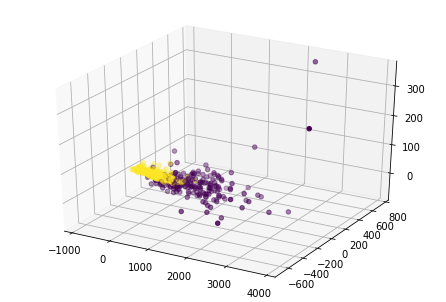

In [87]:
import numpy as np
from sklearn.datasets import load_breast_cancer

from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data = load_breast_cancer()
X = data.data
y = data.target

pca = PCA()
X = pca.fit_transform(X)
#print(X[:,:3])

explained_variance = pca.explained_variance_ratio_
print(explained_variance[:3])
print(sum(explained_variance[:3]))

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(X[:,0], X[:,1], X[:,2], c=y)
plt.show()

<IPython.core.display.Javascript object>


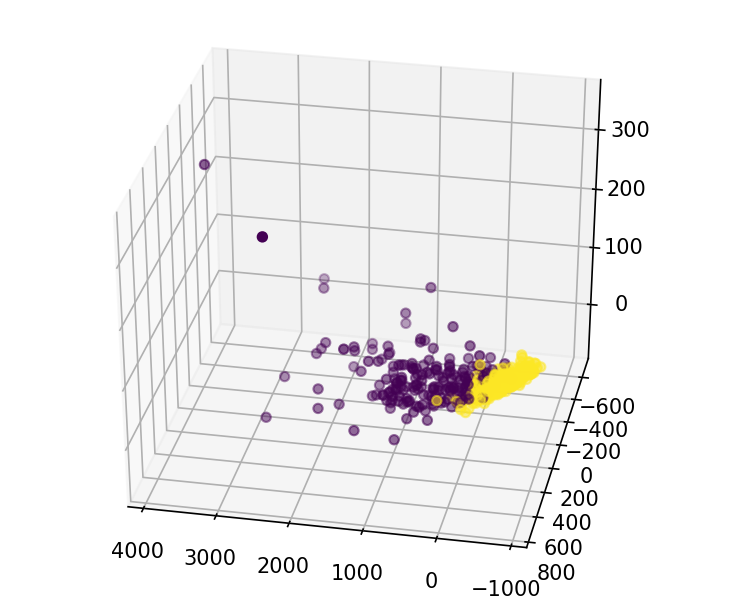

[0.98204467 0.01617649 0.00155751]


# Zadanie 6

Na danych z zadania 5 w oparciu o pierwszą składową stwórz model i sprawdź jak ten model sobie radzi.

In [91]:
import numpy as np
from sklearn.datasets import load_breast_cancer

from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data = load_breast_cancer()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)

model_origin = LogisticRegression().fit(X_train,y_train)
y_pred_origin = model_origin.predict(X_test)
print(CR(y_test,y_pred_origin))

pca = PCA()
X = pca.fit_transform(X)
#print(X[:,:3])

X = X[:,0].reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)
model_transform = LogisticRegression().fit(X_train,y_train)
y_pred_transform = model_transform.predict(X_test)
print(CR(y_test,y_pred_transform))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        41
           1       0.96      1.00      0.98        73

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

              precision    recall  f1-score   support

           0       0.97      0.80      0.88        41
           1       0.90      0.99      0.94        73

    accuracy                           0.92       114
   macro avg       0.94      0.90      0.91       114
weighted avg       0.93      0.92      0.92       114



C:\Users\Dawid\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Zadanie 7

Zastosuj algorytm wstecznego doboru zmiennych(Recursive Feature Elimination) do dowolnego modelu(nie regresji logistycznej) z wcześniejszych ćwiczeń.
(zob. http://www.thespermwhale.com/jaseweston/GENESEL.PDF )


In [96]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn.linear_model as lm
from sklearn.svm import SVC
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import scale
from sklearn import datasets
boston = datasets.load_boston()

X, y = boston.data, boston.target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2)
X_train, X_test = scale(X_train), scale(X_test)

estimator = lm.LinearRegression()
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X_train, y_train)

y_pred = selector.predict(X_test)

print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test,y_pred))
print(boston.feature_names)
print(selector.support_)

0.6481557950321475
27.380360467032077
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[False False False False  True  True False  True False False  True False
  True]


# Dodatek

Zapoznaj się z https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection

Istnieje wiele innych podejść m. in. algorytm Boruta:
https://www.jstatsoft.org/article/view/v036i11/v36i11.pdf

jego działanie:
https://github.com/scikit-learn-contrib/boruta_py/blob/master/boruta/examples/Madalon_Data_Set.ipynb

# Zadanie 8

Na wybranych przez siebie danych porównaj efekt jednego z omawianych podejść ze statystycznym podejściem.

In [20]:
import pandas
import numpy
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# load data
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
print(dataframe.head(13))

X = array[:,0:8]
Y = array[:,8]
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)
# summarize scores
numpy.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:13,:])

    preg  plas  pres  skin  test  mass   pedi  age  class
0      6   148    72    35     0  33.6  0.627   50      1
1      1    85    66    29     0  26.6  0.351   31      0
2      8   183    64     0     0  23.3  0.672   32      1
3      1    89    66    23    94  28.1  0.167   21      0
4      0   137    40    35   168  43.1  2.288   33      1
5      5   116    74     0     0  25.6  0.201   30      0
6      3    78    50    32    88  31.0  0.248   26      1
7     10   115     0     0     0  35.3  0.134   29      0
8      2   197    70    45   543  30.5  0.158   53      1
9      8   125    96     0     0   0.0  0.232   54      1
10     4   110    92     0     0  37.6  0.191   30      0
11    10   168    74     0     0  38.0  0.537   34      1
12    10   139    80     0     0  27.1  1.441   57      0
[ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.393  181.304]
[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 [ 89.   94.   28.1  21. ]
 [137.